Complete the exercises below For **Assignment #6**.

Import the following items,
- `pandas as pd`,
- `LinearRegression` from the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module,
- `make_column_transformer` from [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose),
- `OneHotEncoder` from [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing),
- `make_pipeline` from the [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) module, and,
- everything from the [plotnine]() package.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from plotnine import *

## Read in our data for this exercise

Use `pd.read_csv` to read in data from the following URL: http://bit.ly/2IgDF0E. Capture the data into a dataframe called `df_voles`.

❗️Hint: just like in `R` we can read data directly from a URL.

In [3]:
df_voles=pd.read_csv("http://bit.ly/2IgDF0E")

Preview the data with the `.head()` method.

The data contains the variables:

- `site` for the id of each random study site (each case or row is a survey/trapping site)
- `voles` for the vole count at each site
- `veg` for the percent cover of vegetation at each site
- `soil` identifying a site as “moist” or “dry”

In [4]:
df_voles.head()

,site,voles,veg,soil
0,1,17,4,moist
1,2,30,33,moist
2,3,54,94,moist
3,4,49,64,moist
4,5,34,32,moist


## EDA

Let's make a few figures from `df_voles` using `ggplot` from **Plotnine**.

In the cell below plot the `voles` variable (y-axis) versus the `veg` variable and color points by the `soil` variable.

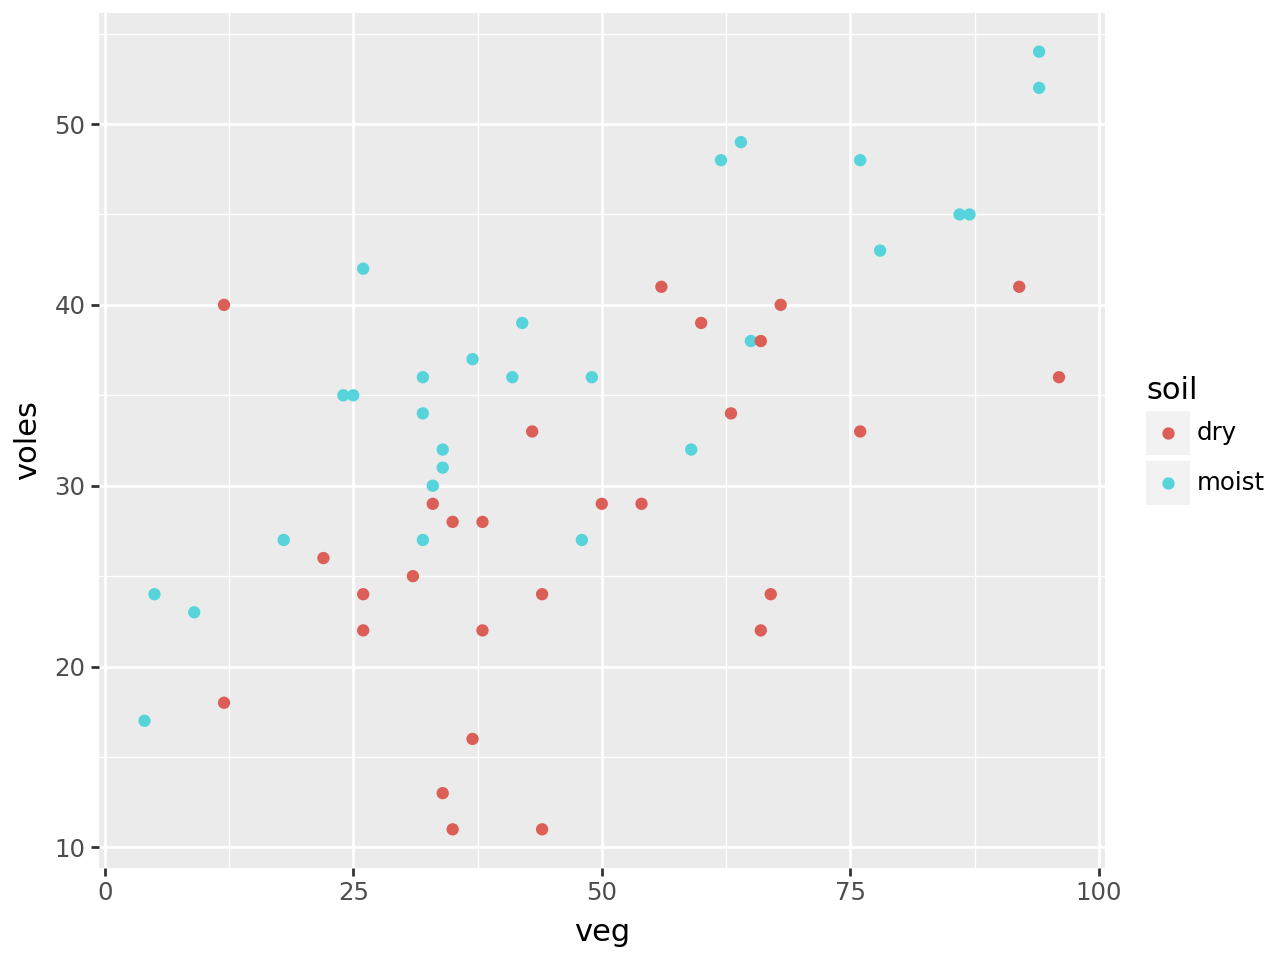

In [5]:
plot = (
    ggplot(df_voles, aes(x='veg', y='voles', color='soil')) +
    geom_point()
)

plot

## Modeling

In the cell below, model `voles` with `soil` and `veg` as predictors in a parallel slopes model. 

Here are the steps I would take:
1. Make a column transformer with `make_column_transformer` that transforms `soil` with `OneHotEncoder(drop="first")` and passes 'veg' through untransformed.
2. Create a pipeline with `make_pipeline` using the column transformer from above and `LinearRegression()` as my model. 
3. Get the `X` (training data) and `y` predictor from `df_voles`
4. Use the `.fit()` method for the pipeline to train the model with `X` and `y`. 

In [6]:
X = df_voles[["soil", "veg"]]
y = df_voles["voles"]

column_transformer = make_column_transformer(
    (OneHotEncoder(drop="first"), ["soil"]), ("passthrough", ["veg"]))

pipeline = make_pipeline(column_transformer, LinearRegression())

pipeline.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['soil']),
                                                 ('passthrough', 'passthrough',
                                                  ['veg'])])),
                ('linearregression', LinearRegression())])

Use the function below to get the parameter values for your model from above.

In [7]:
def get_regression_table(pipeline):
    terms=list(pipeline['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(
        term=terms, 
        estimate=estimates,
    )
    return pd.DataFrame(data)

In [8]:
get_regression_table(pipeline)

,term,estimate
0,onehotencoder__soil_moist,9.100298
1,passthrough__veg,0.259069
2,intercept,15.464026


❓Would protecting a site with high vegetation cover be a more effective way to preserve the vole population than a site with low vegetation cover? Why?

(**Hint:** use your chart above to answer. It's also possible to leverage your regression parameters if you chose to model `voles` with a parallel slopes model.)

**Answer:**

From the regression model and the scatter plot, we can conclude that high vegetation is more effective for preserving the voles population. The scatter plot the voles vs vegetation we can say that vole count increases as vegatation cover increases. In the regression model the coefficient of vegetation cover is 0.259 which is a positive coefficient. It suggests that every unit increases in vegetation cover there is a 0.26 vole count. This means that higher vegetation cover means it will have higher vole population. Overall from the scatter plot and coefficient test we can deduct that preserving the vole population can strategically have a positive vegatation cover and vole count.  

❓Dry sites typically cost a lot less to purchase and maintain for conservation organizations. Thus, if a conservation organization decides to purchase a few dry sites, roughly what percent cover of vegetation do they need to maintain on these sites (at a minimum) to support a population of about 30 voles at the site?

(**Hint:** In your chart above, draw a line at voles = 30 using `geom_hline` and make a rough estimate for this answer...)

**Answer:**

In [16]:
df_voles_pred = df_voles.assign(pred_voles=lambda df_: pipeline.predict(df_))
df_voles_pred.head()

,site,voles,veg,soil,pred_voles
0,1,17,4,moist,25.600600
1,2,30,33,moist,33.113599
2,3,54,94,moist,48.916804
3,4,49,64,moist,41.144736
4,5,34,32,moist,32.854530


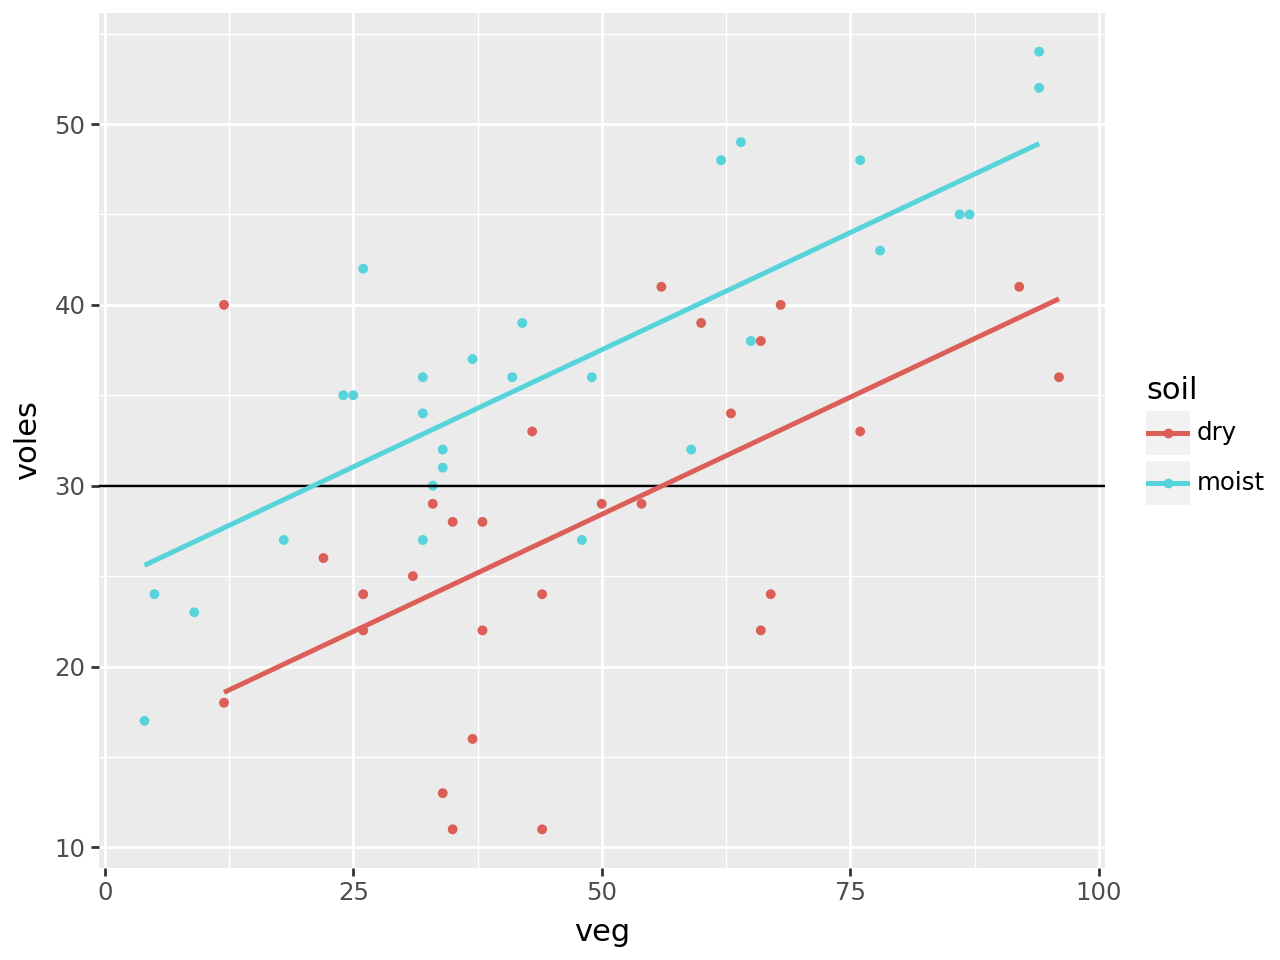

In [19]:
plot = (
    ggplot(df_voles_pred, aes(x='veg', y='voles', color='soil')) +
    geom_point(size = 1)+
    geom_hline(yintercept=30) +
    geom_line(aes(y='pred_voles'), size=1)
)
plot

With the graphs above, we can estimate that the minimum percent cover of the vegatation for dry sites is aout 30 voles. so we can conclude that with 30 voles on dry sites they would need to have about 50% vegatation cover.

❓The Nature Conservancy is looking at purchasing a site for this species (in the same study area) that has moist soil and 40% vegetation cover. Using the regression equation what would you predict as the possible vole population the site might be able to support?

(**Hint:** Use `.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))` with yout pipeline.)

**Answer:**

In [21]:
x=pipeline.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))
print(x)

[34.92708151]


With the predict formula, the moist soil at 40% veg cover would give us about 34.93 which is about 35 voles. 